In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from blackjack_helper import *

pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Card Translation
For efficient calculation, the cards will be translated to integers.
| 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | J | Q | K | A |
| - | ----------|----------| ----------| ----------| ----------| ----------| ----------| ----------| ----------| ----------| ----------| ----------|
| 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 10 | 10 | 10 | 11 |

Every Face Card can simple be treated as 10, because they do not affect play.  
The Ace will be treated as 11, and will be reduced to 1 if the hand value exceeds 21.

In [2]:
deck = get_deck()
print_deck(deck)

   10   A   2   3   4   5   6   7   8   9
0  64  16  16  16  16  16  16  16  16  16


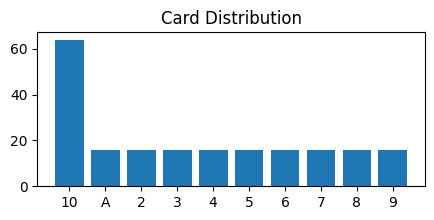

In [3]:
plot_deck(deck)

# The Dealer
The dealer has a certain set of rules, by which he has to play the game. This makes it possible to determine the probabilities of the dealer's hand based on the card distribution. To efficiently generate those probabilities, we will first determine all possible games for the dealer.

To do this, we will use a numpy array, where the first column denotes the number of aces in the hand, and all other columns denote the drawn card (0 meaning no card drawn).
After each draw, we will check if the dealer will terminate the hands, and remove them.
There will be no probability calculation, as those depend on the card distribution.

In [4]:
cards = [10,5]

possibilities = get_dealer_possibilities(cards)
# plot_dealer_possibilities(cards)
possibilities.T

,0,17,18,19,20,21
Count,9,2,2,2,2,2


# Dealer Score Probabilities
Remember that those numbers represent the number of possible games leading to that score, NOT the actual probabilities of that Score occurring. In order to do this, we will need to implement the card distribution.

For that we simply get all possible games for the dealer, and then calculate the probabilities of each game occuring.

In [5]:
cards = [10,5]
deck = get_deck()

possible_hands_prob = get_dealer_hand_probabilities(cards, deck)
possible_hands_prob.sort_values("Probability", ascending=False)[:3]

,Aces,1,2,3,4,Score,Probability
0,0,10,5,10,0,0,0.007273
1,0,10,5,2,0,17,0.001847
2,0,10,5,3,0,18,0.001847


Score,0,17,18,19,20,21
Probability,0.013959,0.001982,0.001991,0.001991,0.001876,0.001982


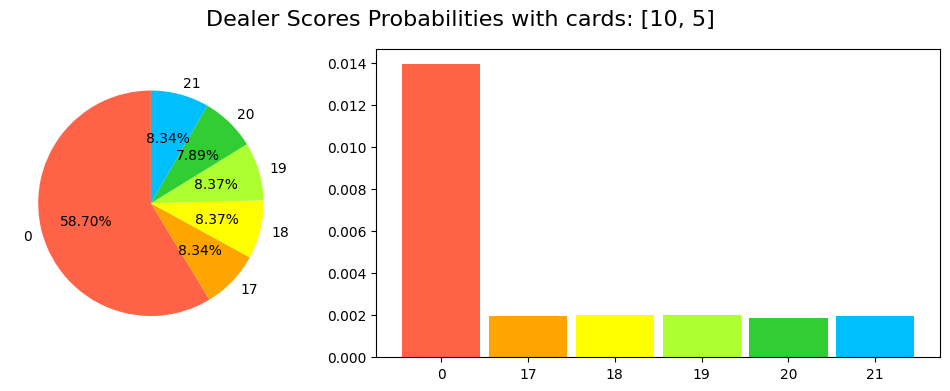

In [6]:
dealer_score_probabilities = get_dealer_score_probabilities(cards, deck)
plot_dealer_score_probabilities(cards, deck)
dealer_score_probabilities.T

In order to see how the probabilities change with a different deck, we will simulate another deck with less 10s.

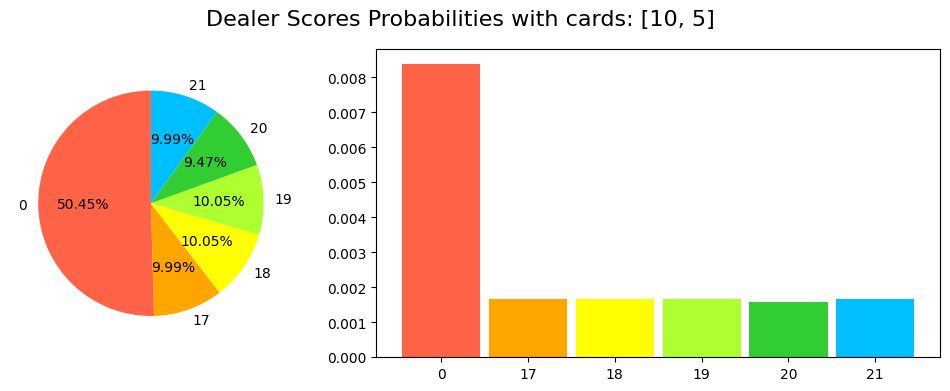

In [7]:
deck = get_deck()
deck[0] /= 2 # half the amount of 10s
plot_dealer_score_probabilities(cards, deck)

# The Hands
In order to calculate the best moves for a player, we will have to implement the different choices that the player can make. Let's first clarify how a game can be represented.

Before the player's turn starts, the dealer gets one face up and one face down card. The face-up card gives us information we have to consider when asessing the best moves.

Each game has to include the following information:
- The Deck
- The Dealer's Face-Up Card
- The Player's drawn cards
The Player's drawn cards will be represented by its score and the number of unused aces. We will call this object a "Hand".

In [8]:
hand = get_hand()
print_hand(hand)

   P_S  P_A  D_S  10   A   2   3   4   5   6   7   8   9
0    0    0    0  64  16  16  16  16  16  16  16  16  16


In [9]:
hand = get_hand(deck=get_deck(), dealer_card=11, player_cards=[5,5])
print_hand(hand)

   P_S  P_A  D_S  10   A   2   3   4   5   6   7   8   9
0   10    0   11  64  15  16  16  16  14  16  16  16  16


Remember that this small df technically represents every information we need about the game. The dealer will start playing after we make our moves, but since this is a pure game of chance, we can calculate the probabilities from the given df.

# The Player's Turn
Instead of updating the hand with one card after each draw and iteratively calculating the following moves, we will instead represent all possible outcomes in a single df. We will call this form of the df a "Game", including the probability for each situation. 

In [10]:
game = get_game()
print_game(game)

   Prob  P_S  P_A  D_S  10   A   2   3   4   5   6   7   8   9
0   1.0    0    0    0  64  16  16  16  16  16  16  16  16  16


In [11]:
game = game_dealer_first_card(game, card=9)
print_game(game)

   Prob  P_S  P_A  D_S  10   A   2   3   4   5   6   7   8   9
0   1.0    0    0    9  64  16  16  16  16  16  16  16  16  15


In [12]:
game = game_player_hit(game, card=9)
print_game(game)

   Prob  P_S  P_A  D_S  10   A   2   3   4   5   6   7   8   9  R1
0   1.0    9    0    9  64  16  16  16  16  16  16  16  16  14   1


In [13]:
game = game_player_hit(game)
print_game(game)

        Prob  P_S  P_A  D_S  10   A   2   3   4   5   6   7   8   9  R1  R2
0   1.000000    9    0    9  64  16  16  16  16  16  16  16  16  14   1   0
1   0.310680   19    0    9  63  16  16  16  16  16  16  16  16  14   1   1
2   0.077670   20    1    9  64  15  16  16  16  16  16  16  16  14   1   1
3   0.077670   11    0    9  64  16  15  16  16  16  16  16  16  14   1   1
4   0.077670   12    0    9  64  16  16  15  16  16  16  16  16  14   1   1
5   0.077670   13    0    9  64  16  16  16  15  16  16  16  16  14   1   1
6   0.077670   14    0    9  64  16  16  16  16  15  16  16  16  14   1   1
7   0.077670   15    0    9  64  16  16  16  16  16  15  16  16  14   1   1
8   0.077670   16    0    9  64  16  16  16  16  16  16  15  16  14   1   1
9   0.077670   17    0    9  64  16  16  16  16  16  16  16  15  14   1   1
10  0.067961   18    0    9  64  16  16  16  16  16  16  16  16  13   1   1


In [14]:
get_game_df(game)["Prob"].sum()

1.9999999999999996

In [18]:
score_probs = get_game_df(game).groupby('P_S')['Prob'].sum()
if 0 not in score_probs.index:
    score_probs[0] = 0
score_probs[0] += score_probs.iloc[21:].sum()
score_probs = score_probs[:21]
pd.DataFrame({"Probability":score_probs}).sort_index(ascending=False)[:6].T

P_S,20,19,18,17,16,15
Probability,0.07767,0.31068,0.067961,0.07767,0.07767,0.07767


<BarContainer object of 12 artists>

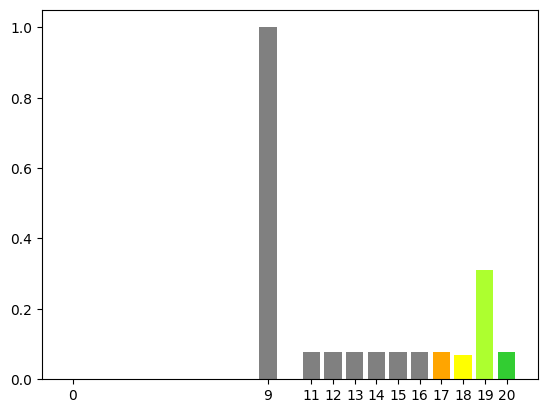

In [19]:
colors = ['gray' if val < 17 and val > 0 else COLORS[val] for val in list(score_probs.index)]
plt.bar(x=list(score_probs.index), height=score_probs.values, tick_label=list(score_probs.index), align='center', color=colors)

In [22]:
print_game(game[0:1,:])

   Prob  P_S  P_A  D_S  10   A   2   3   4   5   6   7   8   9  R1  R2
0   1.0    9    0    9  64  16  16  16  16  16  16  16  16  14   1   0


In [23]:
s = get_win_lose_prob(game[0:1,:])
s

,Win,Lose,Draw
0,0.015682,0.052279,0


In [26]:
dealer_card = list(game[0,3:4])
deck = game[0,4:14]

player_score = game[0,1]

scores_prob = get_dealer_score_probabilities(dealer_card, deck)
scores_prob

,Probability
Score,
0,0.015682
17,0.008302
18,0.007334
19,0.024218
20,0.008256
21,0.00417


In [30]:
get_dealer_hand_probabilities(dealer_card, deck)

,Aces,1,2,3,4,5,6,7,8,Score,Probability
0,0,9,10,0,0,0,0,0,0,19,0.021217
1,1,9,11,0,0,0,0,0,0,20,0.005304
2,0,9,8,0,0,0,0,0,0,17,0.005304
3,0,9,9,0,0,0,0,0,0,18,0.00431
4,0,9,2,10,0,0,0,0,0,21,0.001664
...,...,...,...,...,...,...,...,...,...,...,...
572,5,9,2,11,11,11,11,11,5,21,0.0
573,5,9,2,11,11,11,11,11,6,0,0.0
574,5,9,2,11,11,11,11,11,7,0,0.0
575,5,9,2,11,11,11,11,11,8,0,0.0
